In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
alldata = pd.read_csv('../data/medications.csv')

In [5]:
#analysis
#financial analysis
alldata['COVERAGE_RATIO'] = (alldata['PAYER_COVERAGE']/ alldata['BASE_COST'])

# alldata.head(10)
alldata['START'] = pd.to_datetime(alldata['START'])

In [ ]:
#heatmap
# Create time bins (monthly or quarterly)

alldata['TIME_BIN'] = alldata['START'].dt.to_period('Y')

# Pivot for heatmap (aggregating median coverage per time bin)
heatmap_data = alldata.pivot_table(values='COVERAGE_RATIO', index='TIME_BIN', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.T, cmap="coolwarm", linewidths=0.5)
plt.title("Coverage Ratio Heatmap Over Time")
plt.xlabel("Time")
plt.ylabel("Coverage Level")
plt.savefig('../plots/coverage_heatmap.png')
plt.show()


C:\Users\aditi\AppData\Local\Temp\ipykernel_13116\950212262.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  coverage_trends = alldata.groupby([alldata['START'].dt.to_period('M'), 'Coverage_Level']).size().unstack().fillna(0)
C:\Users\aditi\AppData\Local\Temp\ipykernel_13116\950212262.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  coverage_trends = alldata.groupby([alldata['START'].dt.to_period('M'), 'Coverage_Level']).size().unstack().fillna(0)
C:\Users\aditi\AppData\Local\Temp\ipykernel_13116\950212262.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  coverage_filter = datafilter.groupby([datafilter['START'].dt.to_period('M'), 'Coverage_Level']).size().unstack().fillna(0)
C:\Users\aditi\App

<Figure size 1200x600 with 0 Axes>

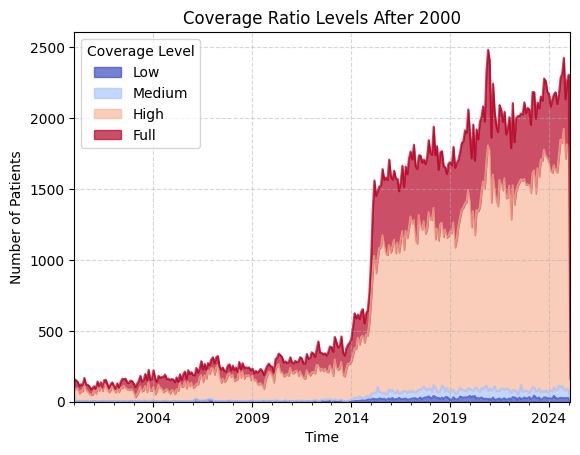

In [16]:
#area chart
# Define coverage categories
bins = [0, 0.3, 0.6, 0.9, 1.0]
labels = ["Low", "Medium", "High", "Full"]
alldata["Coverage_Level"] = pd.cut(alldata["COVERAGE_RATIO"], bins=bins, labels=labels)

# Count occurrences in each category over time
coverage_trends = alldata.groupby([alldata['START'].dt.to_period('M'), 'Coverage_Level']).size().unstack().fillna(0)

datafilter = alldata[alldata['START'].dt.year>=2000]
coverage_filter = datafilter.groupby([datafilter['START'].dt.to_period('M'), 'Coverage_Level']).size().unstack().fillna(0)
# Plot
plt.figure(figsize=(12, 6))
# coverage_trends.plot(kind='area', stacked=True, colormap="coolwarm", alpha=0.7)
coverage_filter.plot(kind='area', stacked=True, colormap="coolwarm", alpha=0.7)

plt.xlabel("Time")
plt.ylabel("Number of Patients")
plt.title("Coverage Ratio Levels After 2000")
plt.legend(title="Coverage Level")
plt.grid(True, linestyle="--", alpha=0.5)
plt.savefig('../plots/coverage2000_areachart.png')
plt.show()
